pip install yfinance

pip install pandas

In [88]:
import yfinance as yf
import pandas as pd
import time

# List of tickers for Indian IT companies
tickers = ['TCS.NS', 'INFY.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']  # Add more tickers as needed

# Create a list to store individual DataFrames
dataframes = []

# Loop through each ticker and fetch the historical data
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="1y")  # Fetch historical data for the last year
        
        # Reset index to make date a column
        hist.reset_index(inplace=True)
        
        # Add a column for the ticker symbol
        hist['Ticker'] = ticker
        
        # Append the DataFrame to the list
        dataframes.append(hist)
        
        # Sleep for a short time to avoid hitting API limits
        time.sleep(1)

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Concatenate all DataFrames into a single DataFrame
all_hist = pd.concat(dataframes, ignore_index=True)

# Print the combined historical market data
print(all_hist)

# Export the data to a CSV file
all_hist.to_csv('it_stocks_historical_data.csv', index=False)

print("Data exported to it_stocks_historical_data.csv")


                          Date         Open         High          Low  \
0    2023-10-09 00:00:00+05:30  3592.740765  3626.203508  3578.892345   
1    2023-10-10 00:00:00+05:30  3587.812399  3595.648261  3549.667823   
2    2023-10-11 00:00:00+05:30  3597.619847  3597.619847  3553.265630   
3    2023-10-12 00:00:00+05:30  3523.695939  3537.149954  3487.325579   
4    2023-10-13 00:00:00+05:30  3479.341604  3525.667115  3474.413358   
...                        ...          ...          ...          ...   
1225 2024-10-03 00:00:00+05:30  1615.000000  1631.150024  1596.150024   
1226 2024-10-04 00:00:00+05:30  1591.000000  1648.400024  1591.000000   
1227 2024-10-07 00:00:00+05:30  1624.949951  1632.050049  1600.199951   
1228 2024-10-08 00:00:00+05:30  1625.000000  1635.000000  1603.599976   
1229 2024-10-09 00:00:00+05:30  1639.000000  1669.800049  1632.050049   

            Close   Volume  Dividends  Stock Splits    Ticker  
0     3586.136963  4233074        0.0           0.0    TCS.

In [89]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data_load = pd.read_csv('it_stocks_historical_data.csv')

In [91]:
data_load.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object

In [92]:
data_load['Date'] = pd.to_datetime(data_load['Date'])
data_load['Date'].head(1)
data_load['Date'] = data_load['Date'].dt.strftime('%Y-%m-%d')

data_load['Date'].head(1)
data_load['Date'] = pd.to_datetime(data_load['Date'])
data_load['Date'].head(1)

0   2023-10-09
Name: Date, dtype: datetime64[ns]

In [93]:
data_load.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2023-10-09,3592.740765,3626.203508,3578.892345,3586.136963,4233074,0.0,0.0,TCS.NS
1,2023-10-10,3587.812399,3595.648261,3549.667823,3576.822266,1848148,0.0,0.0,TCS.NS


## 1. **What is the trend of closing prices for each bank over the last year?**


In [94]:
df_1 = data_load
df_1.reset_index()
df_1.set_index('Date', inplace=True)

In [95]:
df_1.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')

In [96]:
df_1 = df_1.groupby('Ticker').resample('ME').first()

In [97]:
df_1 = df_1[['Open','High','Low','Close', 'Volume']]
df_1.reset_index('Ticker', inplace=True)

In [98]:
df_1['Ticker'].unique()

array(['HCLTECH.NS', 'INFY.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype=object)

In [99]:

start_date = '2023-10-31'  # Replace with your start date
end_date = '2024-09-30'    # Replace with your end date



In [100]:
df_1[(df_1['Ticker'] == 'HCLTECH.NS') & (df_1.index >= start_date) &(df_1.index <= end_date)]

df_1['Ticker'].unique()

array(['HCLTECH.NS', 'INFY.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype=object)

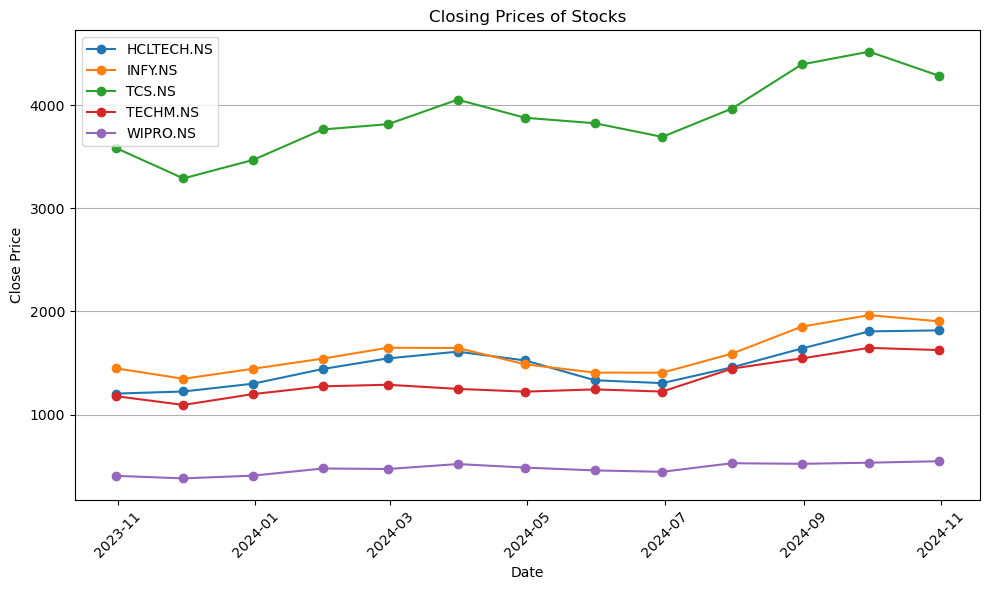

In [101]:
plt.figure(figsize=(10, 6))
for ticker in df_1['Ticker'].unique():
    subset = df_1[df_1['Ticker'] == ticker]
    plt.plot(subset.index, subset['Close'], label=ticker, marker = 'o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices of Stocks')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.legend()  
plt.tight_layout()
plt.show()


### 2. **How do daily returns vary across different IT Companys?**

In [102]:
df_2 = data_load
df_2.reset_index(inplace=True)
df_2.set_index('Date', inplace=True)
df_2.dtypes


Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object

In [103]:
df_2 =df_2.groupby('Ticker').resample('D').first()

In [104]:
df_2= df_2[['Open','High','Low','Close', 'Volume']]
df_2.reset_index('Ticker', inplace=True)


In [105]:
import pandas as pd

# Get the current date
current_date = pd.Timestamp.now()

# Calculate the date 30 days prior
days_30_current_date = current_date - pd.Timedelta(days=30)

# Print the results
print("Current date:", current_date.strftime('%Y-%m-%d'))
print("Date 30 days ago:", days_30_current_date.strftime('%Y-%m-%d'))


Current date: 2024-10-09
Date 30 days ago: 2024-09-09


In [106]:
df_2 = df_2[(df_2.index <= current_date) & 
            (df_2.index >= days_30_current_date) ]
df_2 = df_2[['Ticker', 'Close']].dropna()

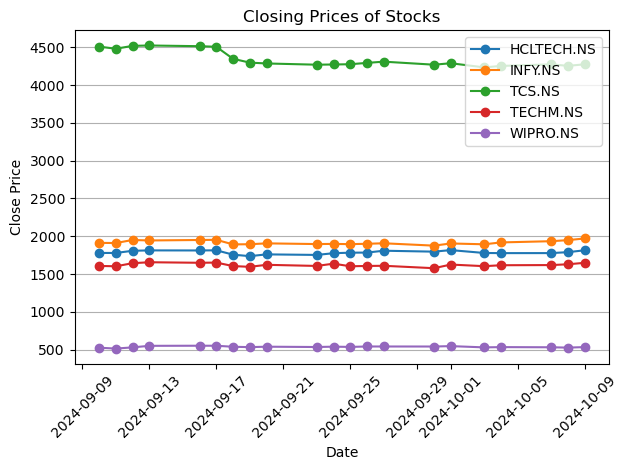

In [107]:
for ticker in df_2['Ticker'].unique():
    #print(ticker)
    subset = df_2[df_2['Ticker'] == ticker]
    plt.plot(subset.index, subset['Close'], label=ticker, marker = 'o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices of Stocks')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.legend()  
plt.tight_layout()
plt.show()

### 3. **What are the average daily closing prices for each IT Company?**


In [108]:
df_3 = data_load
df_3.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object

In [109]:
df_3 = df_3[(df_3.index <= current_date) & (df_3.index >= days_30_current_date) ]
#df_3.reset_index()
#df_3.set_index('Ticker', inplace=True)


In [110]:
df_3[df_3.Ticker == 'TCS.NS']['Close'].mean()

4344.314290364583

       Ticker   Mean Close
0      TCS.NS  4344.314290
1     INFY.NS  1916.871431
2    WIPRO.NS   536.847621
3  HCLTECH.NS  1786.111904
4    TECHM.NS  1619.769055


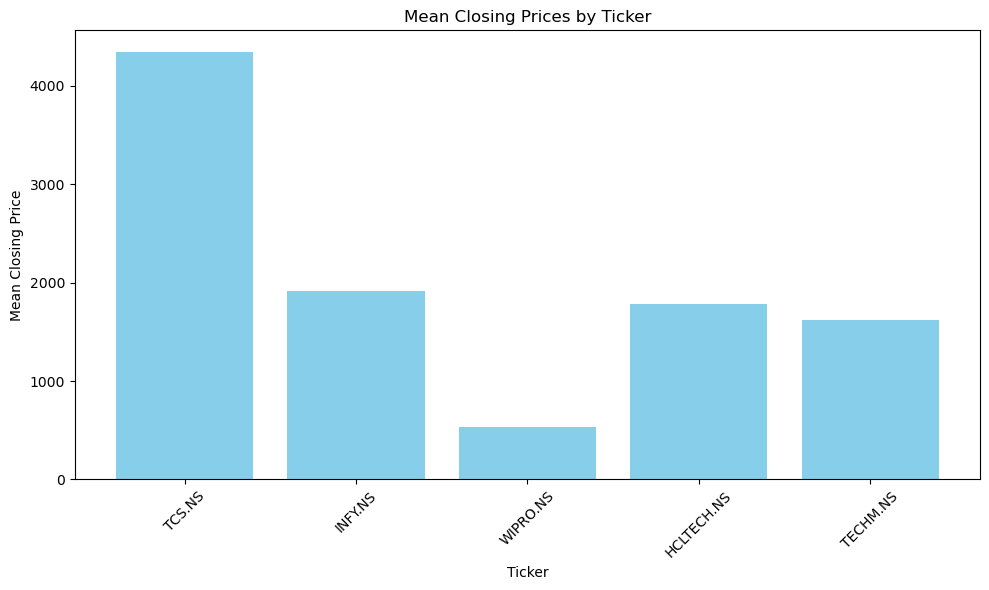

In [111]:
results = []
for ticker in df_3.Ticker.unique():
    mean_close = df_3[df_3.Ticker == ticker]['Close'].mean()
    results.append({'Ticker': ticker, 'Mean Close': mean_close})
mean_close_df = pd.DataFrame(results)
print(mean_close_df)

plt.figure(figsize=(10, 6))
plt.bar(mean_close_df['Ticker'], mean_close_df['Mean Close'], color='skyblue')
plt.xlabel('Ticker')
plt.ylabel('Mean Closing Price')
plt.title('Mean Closing Prices by Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. **How has trading volume changed over time for each IT Company?**


In [112]:
df_4 = data_load


In [113]:
# Get the current date
current_date = pd.Timestamp.now()
# Calculate the date 30 days prior
days_365_current_date = current_date - pd.Timedelta(days=365)
# Print the results
print("Current date:", current_date.strftime('%Y-%m-%d'))
print("Date 365 days ago:", days_365_current_date.strftime('%Y-%m-%d'))

Current date: 2024-10-09
Date 365 days ago: 2023-10-10


TCS.NS
INFY.NS
WIPRO.NS
HCLTECH.NS
TECHM.NS


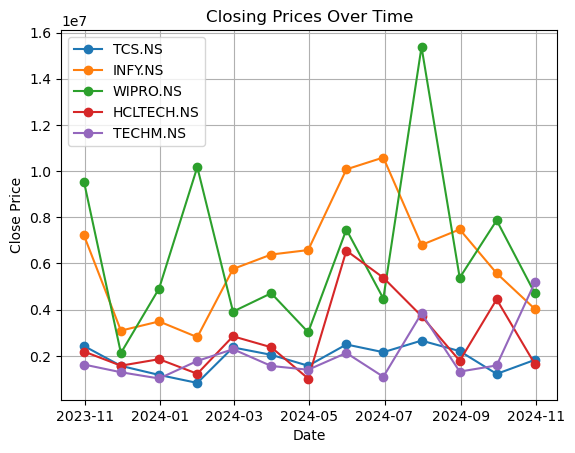

In [114]:

for ticker in df_4['Ticker'].unique():
    print(ticker)
    
    ticker_data = df_4[(df_4.index <= current_date) & 
                       (df_4.index >= days_365_current_date) & 
                       (df_4['Ticker'] == ticker)]
    
    filtered_set = ticker_data.resample('ME').first()

    plt.plot(filtered_set['Volume'], label=ticker,marker ='o')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices Over Time')
plt.grid()
plt.show()


### 5. **What is the distribution of daily returns for each IT Company?**


In [115]:
df_5 = data_load
df_5['Price_change'] = 0.0

In [116]:
# Get the current date
current_date = pd.Timestamp.now()
# Calculate the date 30 days prior
date_10_days_ago  = current_date - pd.Timedelta(days=10)
# Print the results
print("Current date:", current_date.strftime('%Y-%m-%d'))
print("Date 10 days ago:", date_10_days_ago .strftime('%Y-%m-%d'))

Current date: 2024-10-09
Date 10 days ago: 2024-09-29


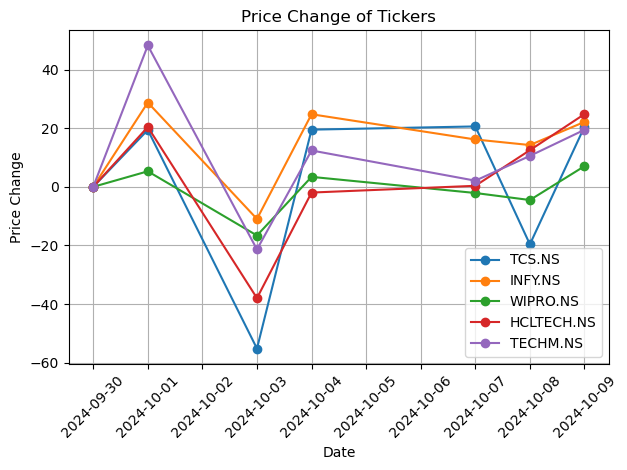

In [117]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on the date range
test = df_5[(df_4.index <= current_date) & (df_4.index >= date_10_days_ago)][['Close', 'Price_change', 'Ticker']]

# Ensure Price_change column is initialized to zero
test['Price_change'] = 0.0

# Iterate over each unique ticker
for ticker in test['Ticker'].unique():
    ticker_data = test[test['Ticker'] == ticker]
    
    start_date = ticker_data.index.min()
    end_date = ticker_data.index.max()
    
    # Calculate price changes
    for i in ticker_data.index:
        if i > start_date:
            loc = ticker_data.index.get_loc(i)
            
            if loc > 0:  # Ensure there's a previous row
                previous_close = ticker_data.iloc[loc - 1]['Close']
                current_close = ticker_data.loc[i]['Close']
                price_difference = current_close - previous_close
                ticker_data.loc[i, 'Price_change'] = price_difference
    
    # Plot Price Change
    plt.plot(ticker_data.index, ticker_data['Price_change'], marker='o',  label=ticker)
    
plt.title('Price Change of Tickers')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.xticks(rotation=45)  
plt.grid()
plt.tight_layout()
plt.show()


 ### 6. **Which IT Company has the highest average closing price?**


In [118]:
# Get the current date
current_date = pd.Timestamp.now()
# Calculate the date 30 days prior
date_365_days_ago  = current_date - pd.Timedelta(days=365)
# Print the results
print("Current date:", current_date.strftime('%Y-%m-%d'))
print("Date 365 days ago:", date_365_days_ago .strftime('%Y-%m-%d'))

Current date: 2024-10-09
Date 365 days ago: 2023-10-10


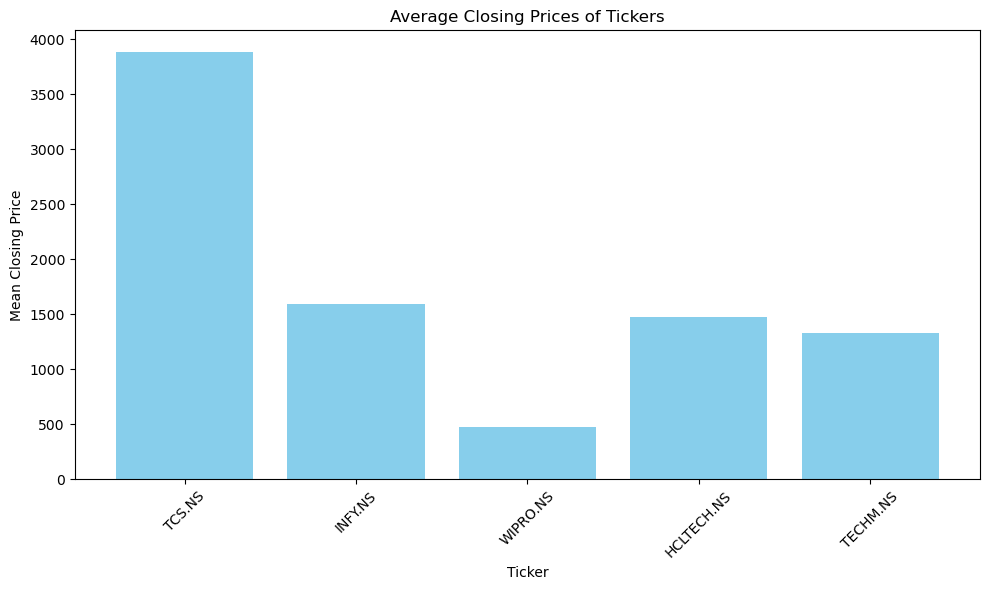

In [119]:
df_6 = data_load
avg_list= []
for ticker in df_6['Ticker'].unique():
    test = df_6[(df_6.index <= current_date) & (df_6.index >= date_365_days_ago) & (df_6['Ticker'] == ticker)]

    test = test.resample('ME').first()
    test = test[['Ticker', 'Close']]
    mean_close= test['Close'].mean()
    avg_list.append({'Ticker': ticker, 'Mean Close': mean_close})
    avg_list
    df_avg_list = pd.DataFrame(avg_list)
    df_avg_list
plt.figure(figsize=(10, 6))
plt.bar(df_avg_list['Ticker'], df_avg_list['Mean Close'], color='skyblue')
plt.xlabel('Ticker')
plt.ylabel('Mean Closing Price')
plt.title('Average Closing Prices of Tickers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 8. **Which IT Companys have the highest correlation in their daily returns?**


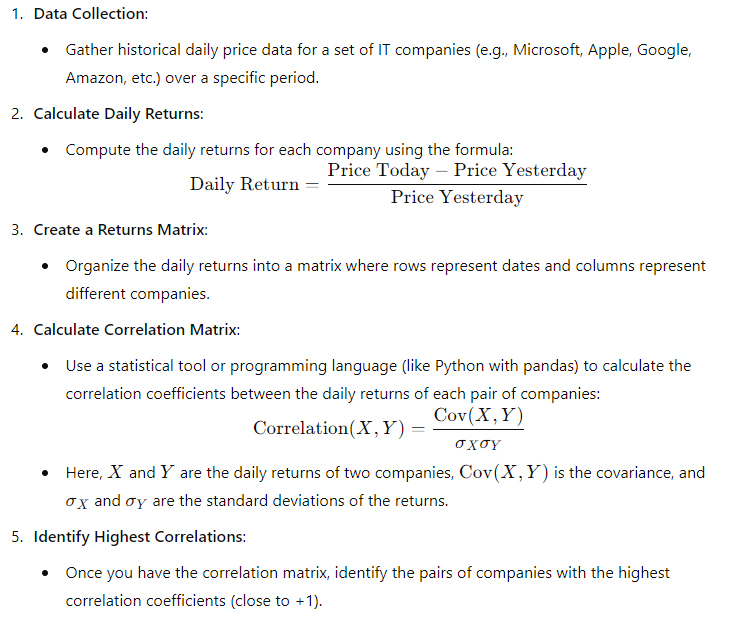

Correlation Matrix:
Ticker      HCLTECH.NS   INFY.NS    TCS.NS  TECHM.NS  WIPRO.NS
Ticker                                                        
HCLTECH.NS    1.000000 -0.893935  0.630438 -0.747881 -0.893007
INFY.NS      -0.893935  1.000000  0.720815  0.894403  0.960288
TCS.NS        0.630438  0.720815  1.000000  0.600443  0.594964
TECHM.NS     -0.747881  0.894403  0.600443  1.000000  0.888293
WIPRO.NS     -0.893007  0.960288  0.594964  0.888293  1.000000

The highest correlation is between INFY.NS and WIPRO.NS with a correlation of 0.96.


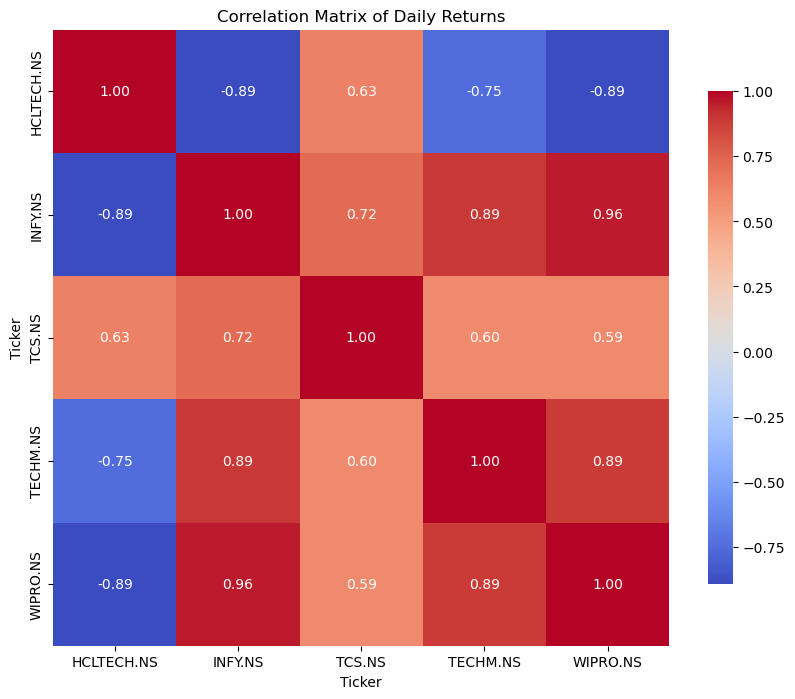

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_6 is your existing DataFrame
# Calculate daily returns
df_6['Daily_Return'] = df_6['Close'].pct_change()

# Pivot the DataFrame to get daily returns for each ticker
daily_returns = df_6.pivot_table(values='Daily_Return', index='Date', columns='Ticker')

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Get the upper triangle of the correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the highest correlation pair
highest_correlation = upper.stack().idxmax()
highest_value = upper.stack().max()

print(f"\nThe highest correlation is between {highest_correlation[0]} and {highest_correlation[1]} with a correlation of {highest_value:.2f}.")

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Daily Returns')
plt.show()


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/77.4 kB ? eta -:--:--
   --------------- ------------------------ 30.7/77.4 kB 660.6 kB/s eta 0:00:01
   --------------------- ------------------ 41.0/77.4 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 77.4/77.4 kB 616.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.6 MB 3.3 MB/s eta 0:00:04
   ---------------------------------------- 0.1/12.6 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.4/12.6 MB 2.9 MB/s eta 0:00:05
   - -------------------------------------- 0.5/12.6 MB 2.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/12.6 MB 3.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.6 MB 3.7 MB/s eta 0:00:04
   ----- ---------------------------------- 1.9/12.6 MB 5.9 MB/s eta 0:00:02
   

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.35.36 requires botocore<1.36.0,>=1.35.36, but you have botocore 1.35.23 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
  Using cached botocore-1.35.36-py3-none-any.whl.metadata (5.7 kB)
Using cached botocore-1.35.36-py3-none-any.whl (12.6 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.23
    Uninstalling botocore-1.35.23:
      Successfully uninstalled botocore-1.35.23
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.15.1 requires botocore<1.35.24,>=1.35.16, but you have botocore 1.35.36 which is incompatible.


Error: Unable to locate credentials
